In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', engine='python')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350045,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350046,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350047,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350048,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [2]:
from pandas.core.frame import DataFrame
ds_filtered=dataset[dataset['location']=='Peru']
ds_filtered=DataFrame(data={"new_cases_smoothed":ds_filtered['new_cases_smoothed'].values},index=ds_filtered['date'].values)
ds_filtered=ds_filtered.fillna(method='bfill').fillna(method='ffill')
ds_filtered

/tmp/ipykernel_8071/2280104074.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds_filtered=ds_filtered.fillna(method='bfill').fillna(method='ffill')


,new_cases_smoothed
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
2020-01-06,0.0
2020-01-07,0.0
...,...
2023-10-14,0.0
2023-10-15,0.0
2023-10-16,0.0
2023-10-17,0.0


<Axes: >

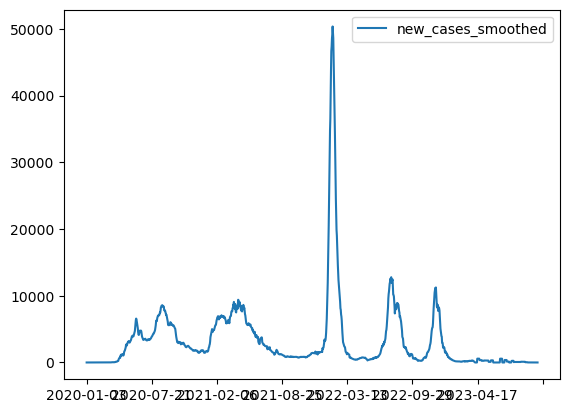

In [3]:
ds_filtered.plot()

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def min_max_scale(x,min,max):
  return (x-min)/(max-min)

def min_max_inverse(x_scaled,min,max):
  return (x_scaled*(max-min))+min

def scale_array(arr,min,max):
  res=[]
  for x in arr:
    res.append(min_max_scale(x,min,max))
  return np.asanyarray(res)

def inv_scale_array(arr,min,max):
  res=[]
  for x in arr:
    res.append(min_max_inverse(x,min,max))
  return np.asanyarray(res)
max=ds_filtered.max()
min=ds_filtered.min()
print(ds_filtered.values.shape)
arr_scaled=scale_array(ds_filtered.values,min,max)
ds_scaled=pandas.DataFrame(arr_scaled)
ds_scaled

(1385, 1)


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1380,0.0
1381,0.0
1382,0.0
1383,0.0


In [18]:
import numpy as np
n_output=7
def input_reshaper(df):
  n_days_input=14
  x=[]
  y=[]
  obj_list=[]
  for i in range(n_days_input,df.shape[0]-n_output):
    input_list=[]
    output_list=[]
    for j in range(0,n_days_input):
      input_list.append(df.iloc[i-(14-j)][0])
    input_mean=np.mean(input_list)
    input_std=np.std(input_list)
    input_list.append(input_mean)
    input_list.append(input_std)
    input_array=np.array(input_list)
    for k in range(0,n_output):
      output_list.append(df.iloc[i+k][0])
    output_array=np.array(output_list)
    x.append(input_array)
    #y.append(df.iloc[i][0])
    y.append(output_array)
    #print(df.iloc[i].name)
  x_array=np.array(x)
  y_array=np.array(y)
  return x_array,y_array,obj_list

input_reshaped_x,input_reshaped_y,objs=input_reshaper(ds_scaled)
print(input_reshaped_x.shape)
print(input_reshaped_y.shape)
input_reshaped_x=input_reshaped_x.reshape(-1,16,1)
input_reshaped_y=input_reshaped_y.reshape(-1,7,1)
print(input_reshaped_x.shape)
print(input_reshaped_x)

(1364, 16)
(1364, 7)
(1364, 16, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [19]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(input_reshaped_x,input_reshaped_y,test_size=0.3,random_state=0)

In [20]:
import tensorflow as tf
keras=tf.keras
from keras.utils.vis_utils import plot_model

model= keras.models.Sequential()
model.add(keras.layers.LSTM(units=16,activation='tanh',recurrent_activation='sigmoid',return_sequences=True,input_shape=(16,1)))
model.add(keras.layers.LSTM(units=16,activation='tanh',recurrent_activation='sigmoid',return_sequences=False))
model.add(keras.layers.Dense(n_output,activation='linear'))
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

2023-10-23 22:22:14.682700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-23 22:22:14.684859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-23 22:22:14.687293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-10-23 22:22:14.944179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-23 22:22:14.946154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-23 22:22:14.947772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [21]:
history=model.fit(xtrain,ytrain,epochs=100,verbose=1,batch_size=16,validation_data=(xtest,ytest))

Epoch 1/100


2023-10-23 22:22:18.515607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-23 22:22:18.518528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-23 22:22:18.520885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/60 [============================>.] - ETA: 0s - loss: 0.0101 - mse: 0.0101

2023-10-23 22:22:24.746265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-10-23 22:22:24.748418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-10-23 22:22:24.750498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

60/60 [==============================] - 7s 41ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2/100
60/60 [==============================] - 2s 31ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/100
60/60 [==============================] - 1s 24ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/100
60/60 [==============================] - 1s 23ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 6/100
60/60 [==============================] - 1s 22ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/100
60/60 [==============================] - 1s 23ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/100
60/60 [==============================] - 1s 20ms/step - loss: 0.0011 - mse: 

In [22]:
print("inputs ",xtrain.shape," outputs ",ytrain.shape)

inputs  (954, 16, 1)  outputs  (954, 7, 1)


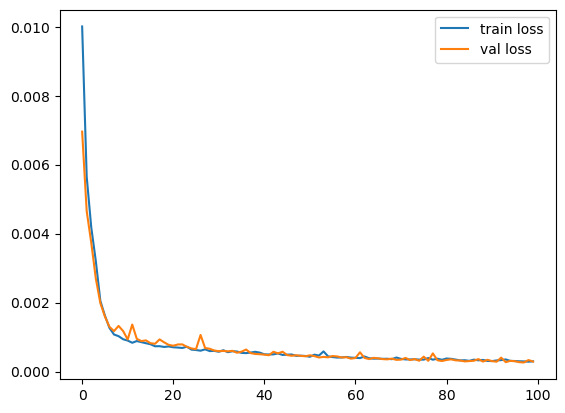

In [23]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
xc         = range(100)
plt.figure()
plt.plot(xc, train_loss,label='train loss')
plt.plot(xc, val_loss,label='val loss')
plt.legend()

In [59]:
model.save('model.h5')

In [61]:
import sklearn.metrics as metrics

# make predictions
testPredict = model.predict(xtest)
testPredict=testPredict.reshape(-1,7)
ytest=ytest.reshape(-1,7)
y_unscaled=[]
for y in ytest:
    y_unscaled.append(inv_scale_array(y,min,max))
predict_unscaled=[]
for p in testPredict:
    predict_unscaled.append(inv_scale_array(p,min,max))


y_unscaled=np.array(y_unscaled)
predict_unscaled=np.array(predict_unscaled)
y_unscaled=y_unscaled.reshape(-1,7)
predict_unscaled=predict_unscaled.reshape(-1,7)

print('R2: ',metrics.r2_score(y_unscaled,predict_unscaled))
print('RMSE: ',metrics.mean_absolute_error(y_unscaled,predict_unscaled))
print('MAPE: ',metrics.mean_absolute_percentage_error(y_unscaled,predict_unscaled))


13/13 [==============================] - 0s 8ms/step
R2:  0.979459342982631
RMSE:  469.8757177292718
MAPE:  1.0168018993314538e+17
